In [1]:
import numpy as np
np.bool = np.bool_
import pyemma.msm as msm
import pyemma.plots as mplt
import matplotlib as mt
import matplotlib.pyplot as plt
import MDAnalysis as mda
import sys
sys.path.append('../../0_python_modules/')
import msm_analysis as ana
import idp_analysis as idp

In [2]:
n_clus = np.array([20, 30, 50, 70, 100, 150, 250, 350, 500, 700, 1000, 1500])
msm_lags = np.arange(5,70+1,5)
n_pcca = np.array([2, 3, 4, 5, 6])

In [3]:
def get_msm_labels(diff, nc, ml, npc):
    out = []
    for i in range(len(nc)):
        for j in range(len(ml)):
            for k in range(len(npc)):
                out.append([ nc[i], ml[j], npc[k], diff[i,j,k] ])
    return np.array(out)

In [4]:
def get_frames(mdis, dtrj, stds, 
               microstate='large',):
    frames = []
    for a,macro in enumerate(mdis):
        if microstate=='large':
            micro = macro[ stds[macro].argmax() ]
        else:
            micro = macro[ stds[macro].argmin() ]
            
        nframes = np.where(dtrj==micro)
        frames.append(nframes[0])
        
    return frames

def write_frames(pdb, trajs, idata,
                 fid, nconfs=10, otype='random', sel='all', sel2='all',
                ofmt='pdb', opath='./', oname='frame'):
    
    uni = mda.Universe(f'{pdb}', f'{trajs}')
    
    dd = idata[fid]
    
    if otype=='random':
        np.random.seed(0)
        oframes = np.random.choice(fid, nconfs)
    elif otype == 'min':
        oframes = fid[dd.argsort()[:nconfs]]
    elif otype == 'max':
        oframes = fid[dd.argsort()[::-1][:nconfs]]
    elif otype == 'variable':
        oframes = fid[dd.argsort()[::int(len(fid)/nconfs)][:nconfs]]
    else:
        raise ValueError(f'{otype} not in [random, variable, min, max]')
        
    for a,i in enumerate(oframes):
        uni.trajectory[i]
        aa = uni.select_atoms(f'{sel}')
        aa = aa.translate(-uni.select_atoms(sel2).center_of_mass())
        aa.write(f'{opath}{oname}{a}.{ofmt}')

In [5]:
colors = np.array(['salmon', 'dodgerblue', 'teal', 'limegreen', 'sienna', 'violet'])
cmaps = [mt.colors.LinearSegmentedColormap.from_list('', colors[:i], N=i) for i in range(2, 7)]

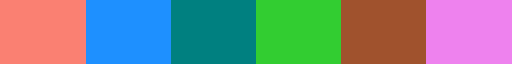

In [6]:
cmaps[4]

In [7]:
trajs = '../../1_datasets/idp_rg/pnas2018b-asyn-a99SBdisp-extended-protein-combined.xtc'
pdb = '../../1_datasets/idp_rg/DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein.pdb'

In [8]:
idata1 = np.loadtxt('../../1_datasets/idp_rg/rg_system.xvg', comments=['@','#'])[:,1]
idata2 = np.loadtxt('../../1_datasets/idp_rg/dist_ca_10-130.xvg', comments=['@','#'])[:,1]

In [9]:
durf = np.load('urf/saved_fdiffs/cmean_strict.npy')
for i in range(5):
    d1 = get_msm_labels(durf[i], n_clus, msm_lags, n_pcca)
    d1 = d1[d1[:,2]==5]
    print(i, np.round(d1[d1[:,3].argmax()], 2) )

0 [20.  10.   5.  36.7]
1 [700.    5.    5.   91.6]
2 [1500.     5.     5.    95.6]
3 [1500.    30.     5.   108.5]
4 [20.   5.   5.  56.4]


In [10]:
durf = np.load('urf/saved_dbi/dbi.npy')
for i in range(5):
    d1 = get_msm_labels(durf[i], n_clus, msm_lags, n_pcca)
    d1 = d1[d1[:,2]==5]
    print(i, np.round(d1[d1[:,3].argmax()], 2) )

0 [150.    50.     5.     3.75]
1 [1500.     30.      5.      4.47]
2 [350.    10.     5.     4.01]
3 [50.   20.    5.    4.29]
4 [150.    35.     5.     2.75]


## i=3, cl=1500, ml=5, pc=5

In [16]:
i=2
cl = 1500
ml = 5
pc = 5

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([   8,   32,   35,   51,   67,   71,   88,  136,  151,  157,  180,
         193,  196,  209,  214,  237,  238,  274,  305,  314,  323,  338,
         377,  403,  410,  428,  430,  437,  453,  475,  482,  527,  555,
         556,  558,  559,  560,  561,  565,  582,  599,  606,  639,  651,
         667,  679,  680,  699,  718,  742,  769,  791,  814,  817,  819,
         825,  835,  840,  872,  877,  881,  936,  968,  985, 1003, 1034,
        1051, 1113, 1115, 1119, 1134, 1141, 1159, 1171, 1173, 1187, 1207,
        1220, 1221, 1226, 1230, 1246, 1250, 1329, 1358, 1381, 1383, 1403,
        1416, 1420, 1437, 1443, 1455, 1461, 1469, 1486]),
 array([   1,   17,   26,   39,   52,   57,   78,   79,   80,  102,  108,
         112,  115,  116,  119,  167,  170,  178,  182,  192,  204,  218,
         219,  224,  227,  245,  252,  261,  270,  272,  293,  303,  315,
         332,  342,  346,  381,  384,  393,  394,  411,  414,  433,  436,
         438,  441,  454,  476,  478,  492,  502,  508

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.72it/s]


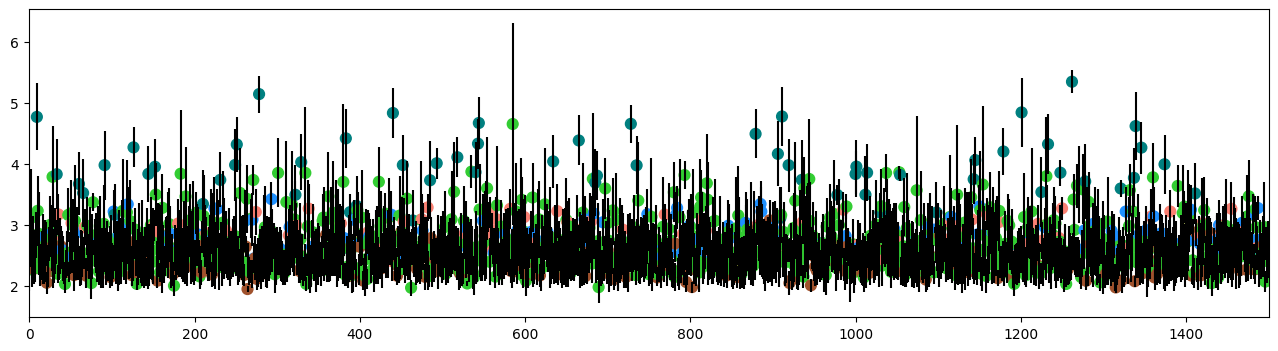

In [17]:
pr = ana.analyze_msm_clusters([dtrj])
pr.take_data([idata1])
means, stds, probs = pr.get_mean()

mcolors = np.zeros((cl))
for a,k in enumerate(model.metastable_sets):
    mcolors[k] = a
    
fig,ax=plt.subplots(1, figsize=(16,4))
ax.errorbar(range(cl), means, fmt='.', yerr=stds, ms=0, ecolor='black')
ax.scatter(range(cl), means, c=colors[mcolors.astype(int)], s=60)
ax.set_xlim(-1,cl)
plt.show()

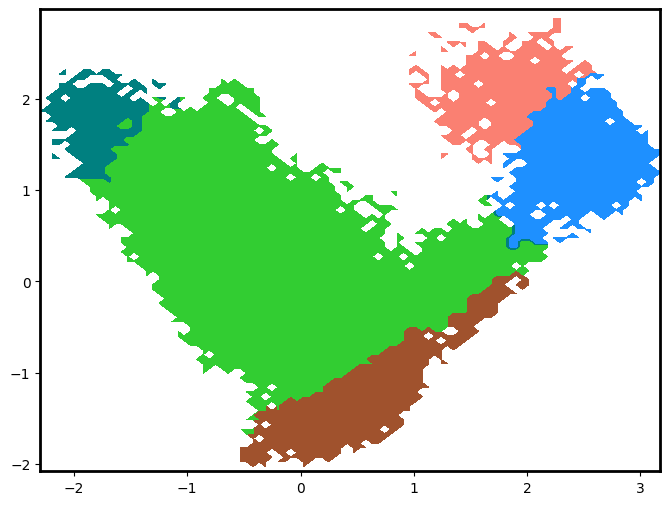

In [18]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

## i=1, cl=700, ml=5, pc=5

In [19]:
i=1
cl = 700
ml = 5
pc = 5

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([  0,   1,   8,  14,  17,  21,  23,  31,  34,  37,  40,  42,  47,
         51,  55,  58,  59,  60,  70,  82,  87,  93,  94,  96,  98, 101,
        102, 104, 109, 118, 120, 121, 124, 137, 138, 139, 142, 144, 147,
        149, 151, 154, 161, 164, 167, 174, 179, 181, 183, 184, 187, 190,
        196, 197, 202, 208, 211, 213, 215, 217, 218, 220, 226, 228, 235,
        241, 245, 250, 251, 255, 263, 267, 268, 269, 273, 274, 275, 276,
        287, 289, 292, 294, 296, 303, 311, 316, 319, 323, 324, 334, 337,
        340, 342, 343, 346, 348, 351, 353, 357, 358, 368, 373, 376, 377,
        380, 385, 386, 390, 392, 396, 401, 402, 403, 406, 414, 417, 418,
        423, 425, 430, 433, 436, 437, 442, 444, 447, 455, 456, 461, 466,
        470, 479, 482, 483, 485, 486, 489, 493, 494, 495, 499, 500, 505,
        510, 513, 515, 519, 521, 522, 523, 524, 528, 539, 540, 543, 549,
        551, 562, 564, 569, 572, 575, 576, 581, 584, 585, 589, 593, 600,
        601, 605, 610, 612, 613, 614, 615, 621, 624

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.87it/s]


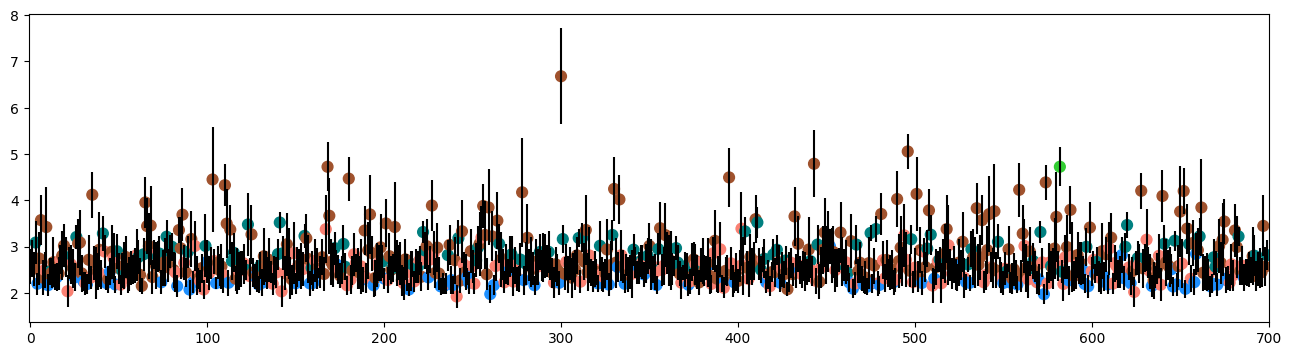

In [20]:
pr = ana.analyze_msm_clusters([dtrj])
pr.take_data([idata1])
means, stds, probs = pr.get_mean()

mcolors = np.zeros((cl))
for a,k in enumerate(model.metastable_sets):
    mcolors[k] = a
    
fig,ax=plt.subplots(1, figsize=(16,4))
ax.errorbar(range(cl), means, fmt='.', yerr=stds, ms=0, ecolor='black')
ax.scatter(range(cl), means, c=colors[mcolors.astype(int)], s=60)
ax.set_xlim(-1,cl)
plt.show()

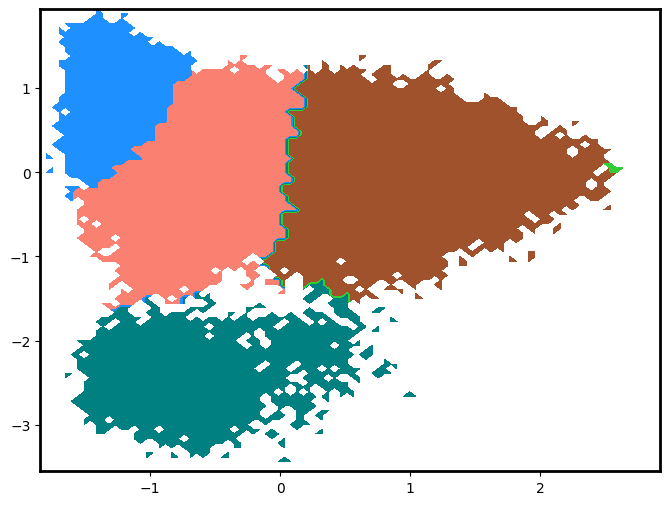

In [21]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

## i=4, cl=150, ml=35, pc=5

In [22]:
i=4
cl = 150
ml = 35
pc = 5

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([  5,  25,  62,  64,  85,  95, 108, 114, 145, 149]),
 array([  1,  11,  19,  35,  37,  45,  54,  56,  59,  70,  83,  84, 101,
        106, 112, 117, 121, 123, 127]),
 array([  7,  10,  12,  14,  22,  29,  30,  31,  47,  48,  49,  51,  52,
         72,  75,  78,  79,  88,  94,  99, 109, 113, 118, 119, 129, 131,
        132, 134, 142, 144, 146]),
 array([  0,   3,   6,   8,   9,  13,  15,  16,  18,  20,  24,  26,  27,
         32,  33,  36,  38,  39,  40,  41,  42,  43,  55,  57,  60,  63,
         65,  67,  68,  69,  71,  73,  74,  76,  77,  80,  82,  86,  89,
         90,  91,  92,  93,  98, 100, 103, 104, 107, 110, 115, 116, 120,
        122, 128, 130, 133, 135, 136, 139, 140, 141, 143, 148]),
 array([  2,   4,  17,  21,  23,  28,  34,  44,  46,  50,  53,  58,  61,
         66,  81,  87,  96,  97, 102, 105, 111, 124, 125, 126, 137, 138,
        147])]

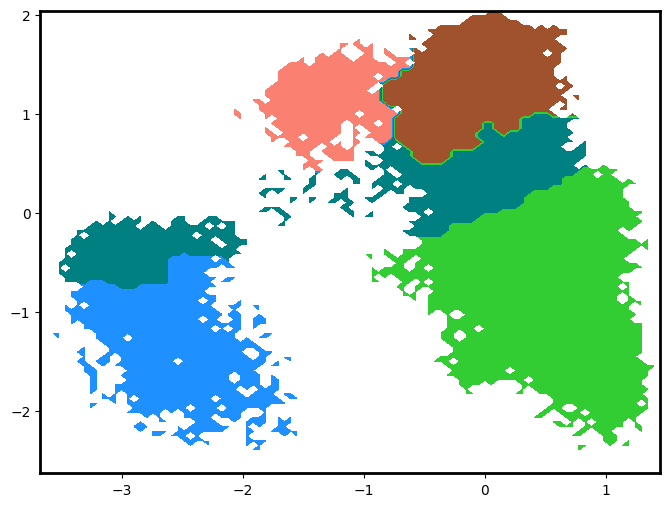

In [23]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()